# Decision Trees

- Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

- Content

**Attribute Information**
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

___

***Things to do***
- Perform the data pre-processing.
- Deal with missing values
- Perform EDA
- Using `StandardScalar` standardize the variables expect the target variable
- Convert the scaled features to a dataframe
- Split into training and testing set
- Fit Decision Tree, Logistic Regression, KNN classifier
- Get Predictions
- For KNN, create a plot `K-value` vs `error` to get the optimal value of K.
- Retrain it with new K.
- Compare accuracies using confusion matrices
- Visualize the Decision Tree using sklearn
 
***What will be new***
- You will learn the Decision Tree classifier and how it works.
- How to visualize a Decision tree (Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library) - Sample code is shared below
 
***What will be tricky***

- Visualizing the decision tree might be a bit tricky for you because you haven't done anything like this before.
- I have shared a sample code of how to visualize a decision tree, it will help you.

##### Note: Like KNN, Decision Tree also has a Regression model as well. So you can apply this on the linear regression data set and compare the accuracy with other models

In [2]:
### Sample code for Decision Tree visualization

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

import pydot 

features = list(df.columns[1:])

features
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

C:\Users\delchain_default\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: name 'df' is not defined

In [3]:
# 2nd sample code

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# DF info:
 - df.shape : 383 x 14
 - no missing values
 - all numeric values
 

IndentationError: unexpected indent (<ipython-input-6-e6c3dded3aad>, line 2)

## Standardize, split into train/ test, save a pandas df

In [7]:
# lets standardize the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# separate the data from the target attributes
X = df[['age','sex', 'cp', 'trestbps', 'chol', 'fbs' , 'restecg' , 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

# Get column names first (provided data was organised this way)
names = X.columns   

# standardize the data attributes
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)

# save as pandas datagrame
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df = pd.concat((scaled_df,y),axis=1)                # add the column with string values
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


## EDA

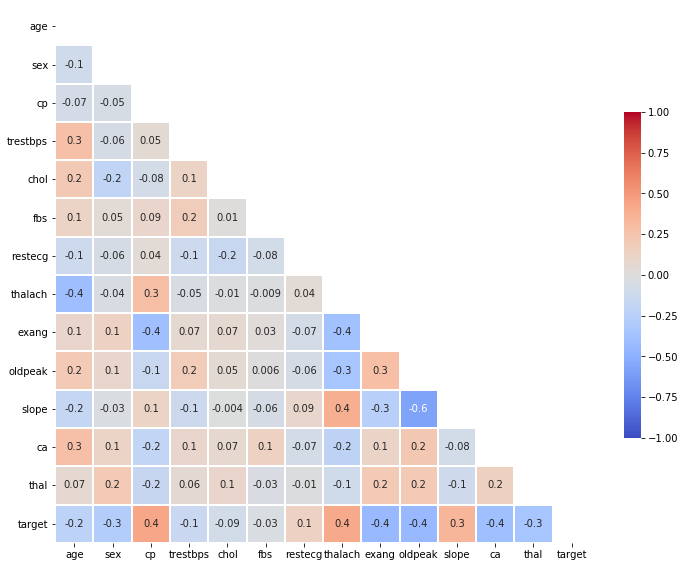

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(scaled_df.corr())

sns.heatmap(scaled_df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True, mask = mask, cbar=True, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')


IndexError: list index out of range

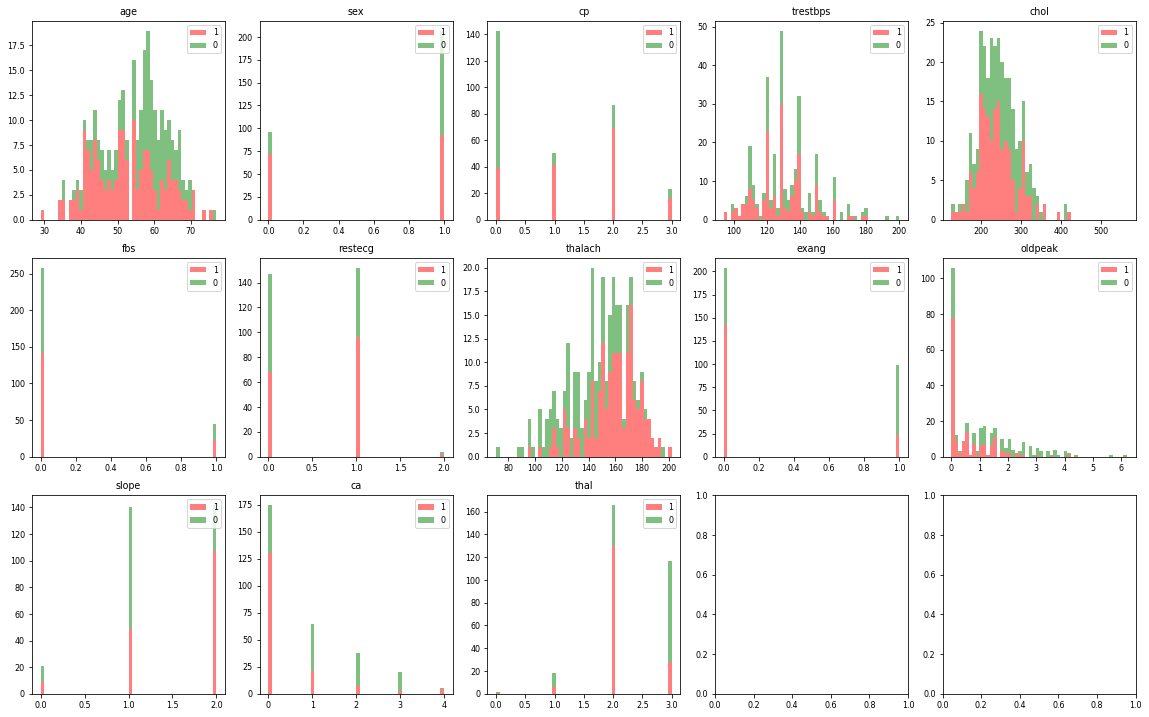

In [9]:
features_mean=list(df.columns[0:13])
# split dataframe into two based on diagnosis
df1 = df[df['target'] ==1]
df0 = df[df['target'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    
    ax.hist([df1[features_mean[idx]],df0[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['1','0'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

    plt.tight_layout()
plt.show()

In [ ]:
# Actually, I am interesteed to know whether it is possible just to disclose 13 graphs instead of 15 (5x3 grid)

indicators to look at:
    - high cp (> 0)
    - high thalach (> 150)
    - low exang (0)
    - low ddpeak (0)
    - high slope (2)
    - thal of 2

## Machine Learning

In [16]:
X = scaled_df[['age','sex', 'cp', 'trestbps', 'chol', 'fbs' , 'restecg' , 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

In [33]:
from sklearn.model_selection import train_test_split

# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_test.shape

(61,)

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

86.78

In [19]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold)

print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))
print(results_kfold)

Accuracy: 75.00%
[1.         0.5        0.83333333 0.66666667 0.83333333 0.83333333
 0.66666667 0.5        0.83333333 0.83333333]


In [20]:
coeff_df = pd.DataFrame(scaled_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,trestbps,1.077993
7,exang,0.678562
6,thalach,0.343535
10,ca,0.163739
5,restecg,0.092621
0,sex,-0.172906
12,target,-0.232479
4,fbs,-0.253160
3,chol,-0.432544
8,oldpeak,-0.537132


### KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn_train)

acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)
print(acc_knn_test)

90.5
72.13


In [22]:
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

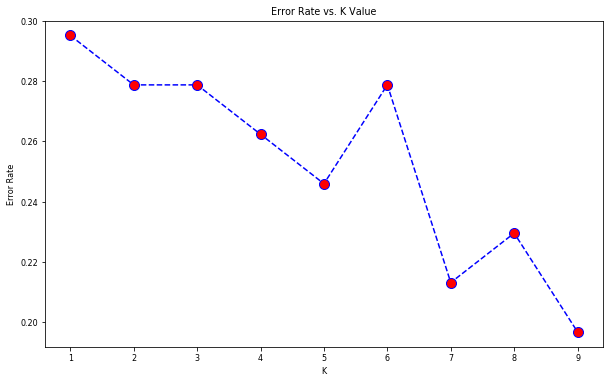

In [23]:
plt.figure(figsize=(10,6))

plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn_train)

acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)
print(acc_knn_test)



88.84
80.33


In [25]:
# I do not understand the output:
  # - The accuracy is supposed to be better with n = 9 than n =3 according to the graph above
  # - however, with an n =3, the accuracy is actually better

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc_tree = round(classifier.score(X_train, y_train) * 100, 2)
acc_tree

100.0

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

print(classification_report(y_test, y_pred))

cm.matrix()

[[22  8]
 [ 8 23]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.74      0.74      0.74        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



AttributeError: 'numpy.ndarray' object has no attribute 'matrix'

In [28]:
# So, looking at the confusion matrix and the 61 test sample
# 22 + 23 are correctly predicted (55 / 61 = 74% )
# model predicts 22 + 8 = 49% of not sick while actual occurence is 49%
# there are 8 (upper right corner) ppl who were classified as not sick, who are actually sick (false negative)
# there are 8 (lower left corner) ppl who were classified as sick, who are actually not sick (false positive)


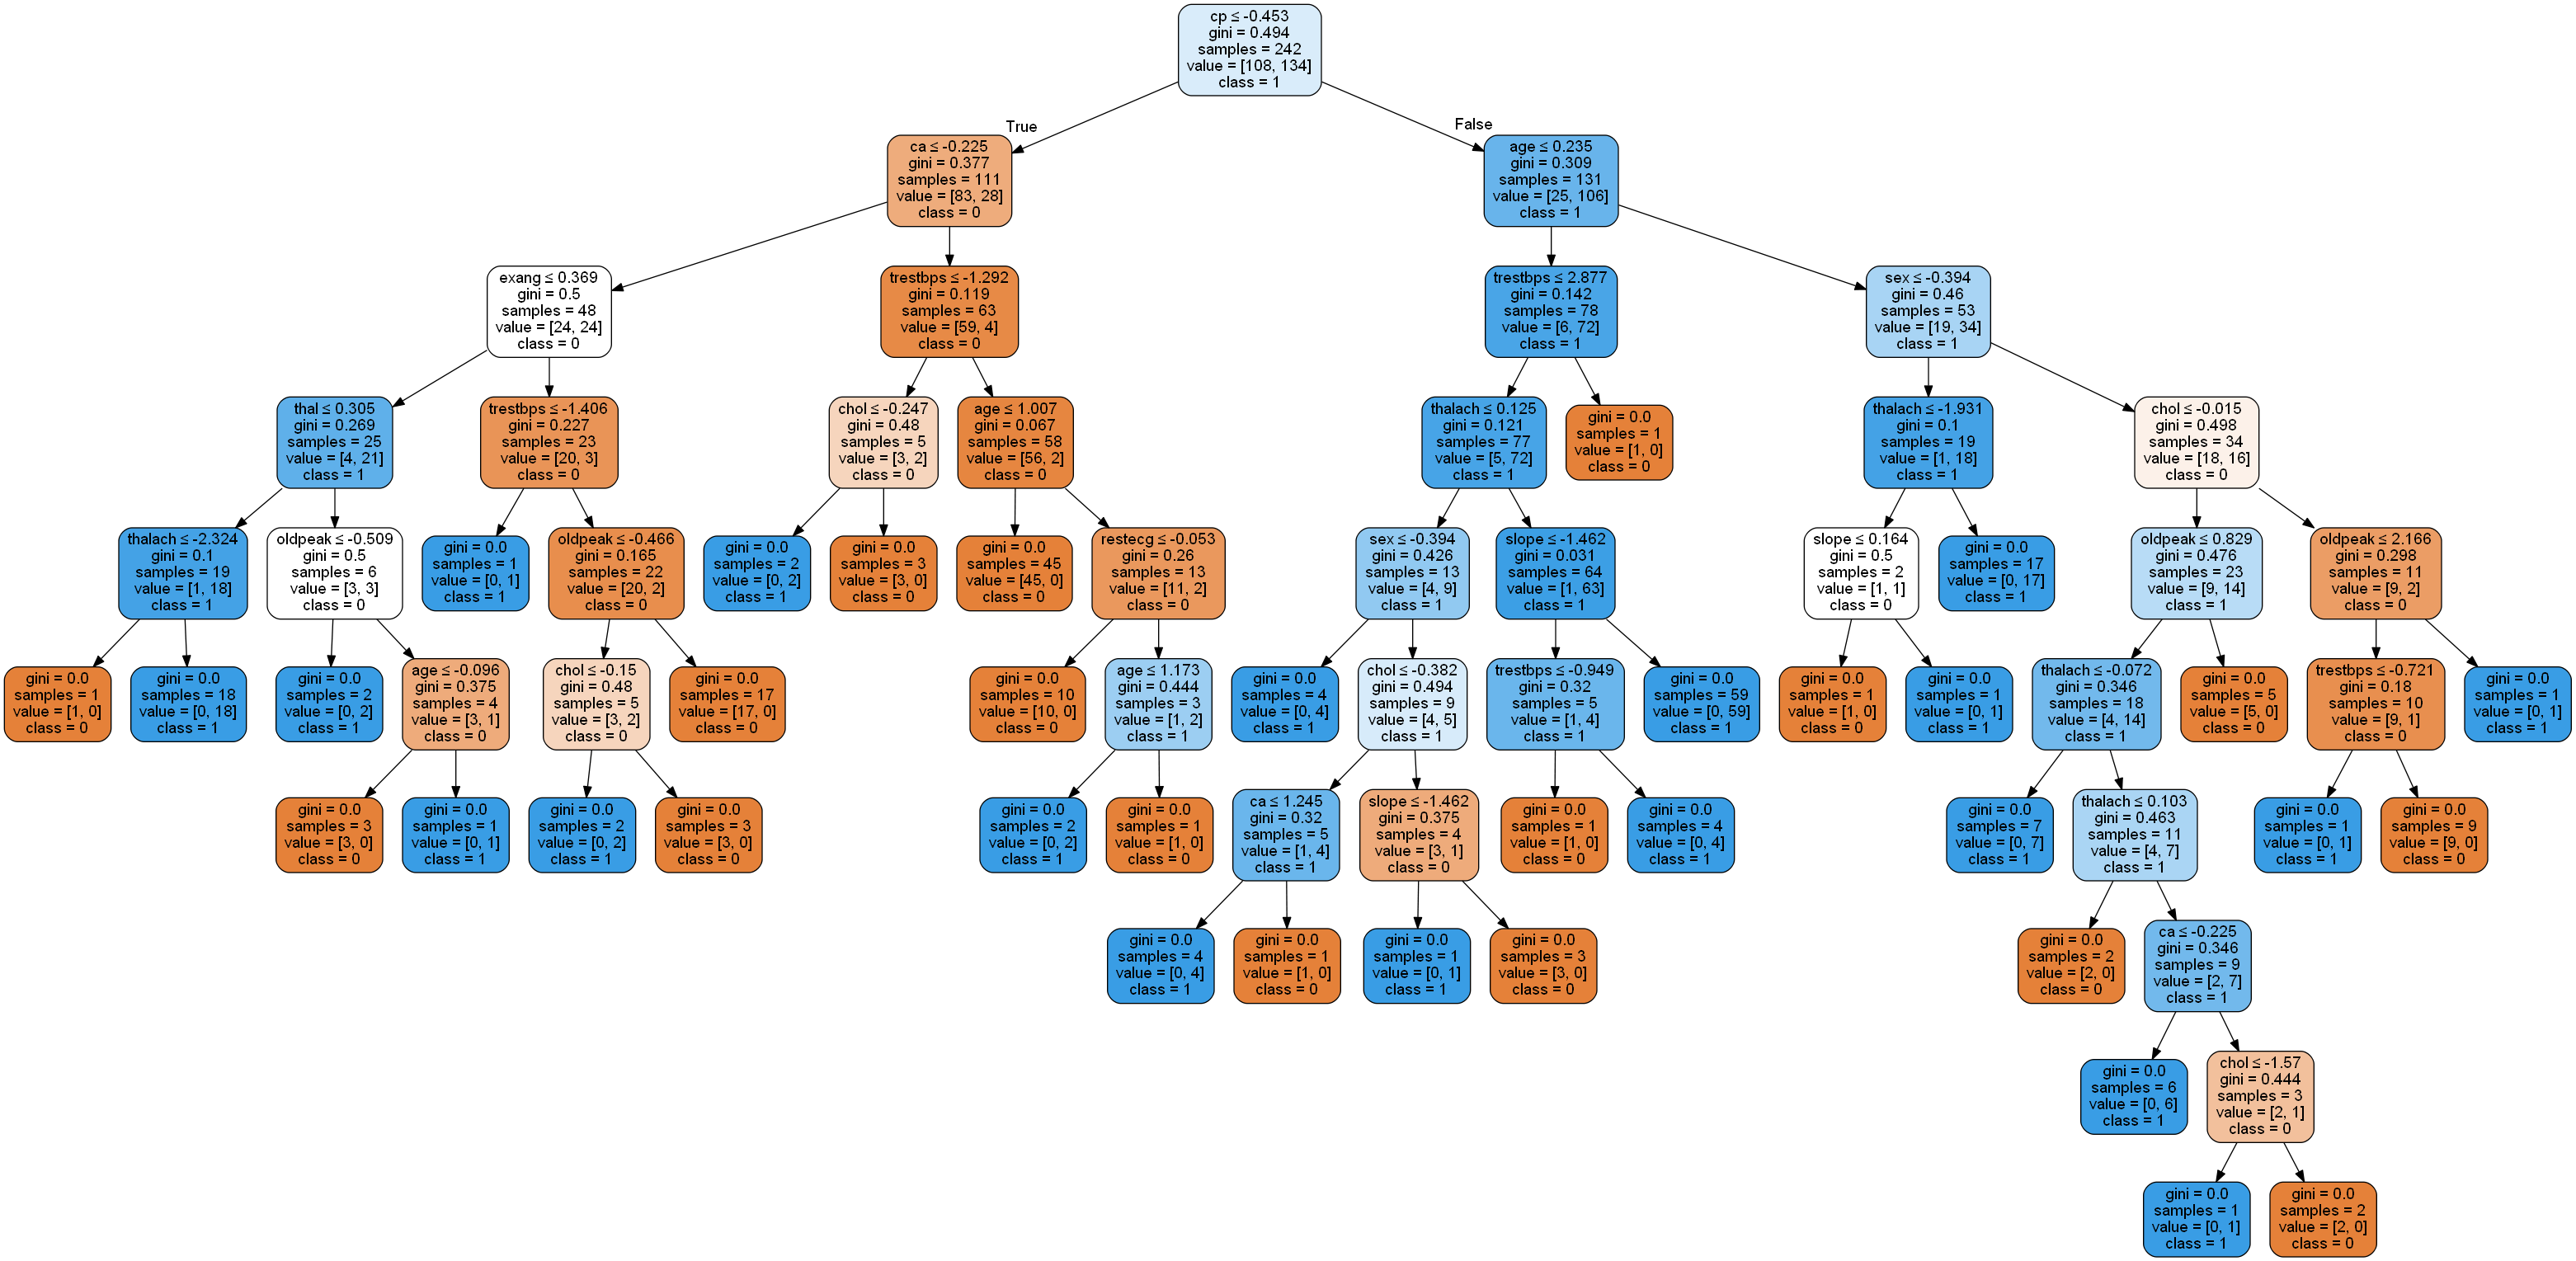

In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = ['age','sex', 'cp', 'trestbps', 'chol', 'fbs' , 'restecg' , 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
